# Task 4: Otsu binarization

In [138]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [139]:
IMAGES_FOLDER = os.path.join(".", "images", "task_4")

In [140]:
def show_image(image, title, cmap, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

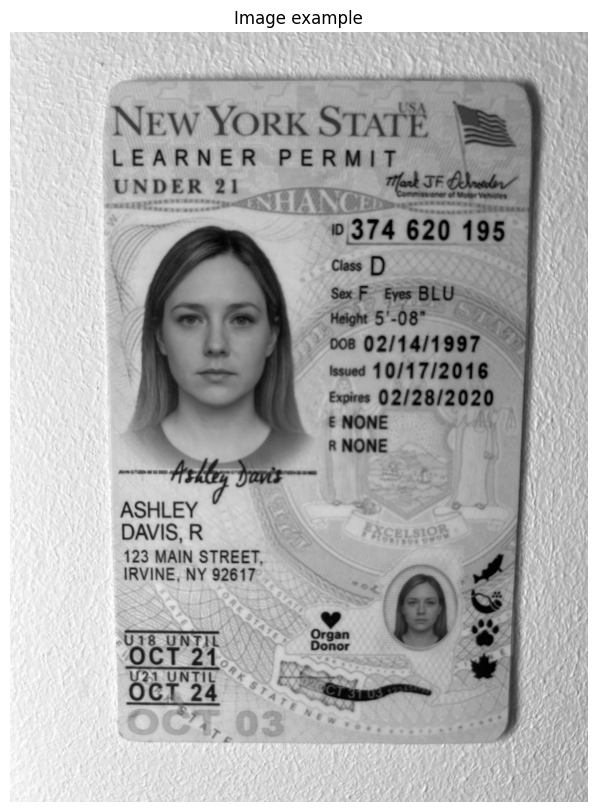

In [141]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_example.png"), cv2.IMREAD_GRAYSCALE)
show_image(image, title="Image example", cmap="gray")

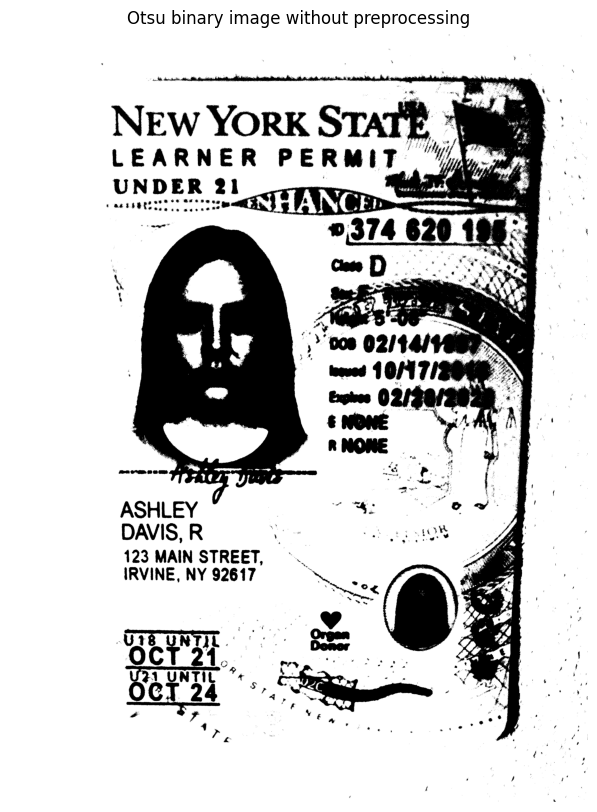

In [142]:
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_image(binary_image, title="Otsu binary image without preprocessing", cmap="gray")

In [143]:
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 
                      for i in range(256)]).astype("uint8")

    return cv2.LUT(image, table)

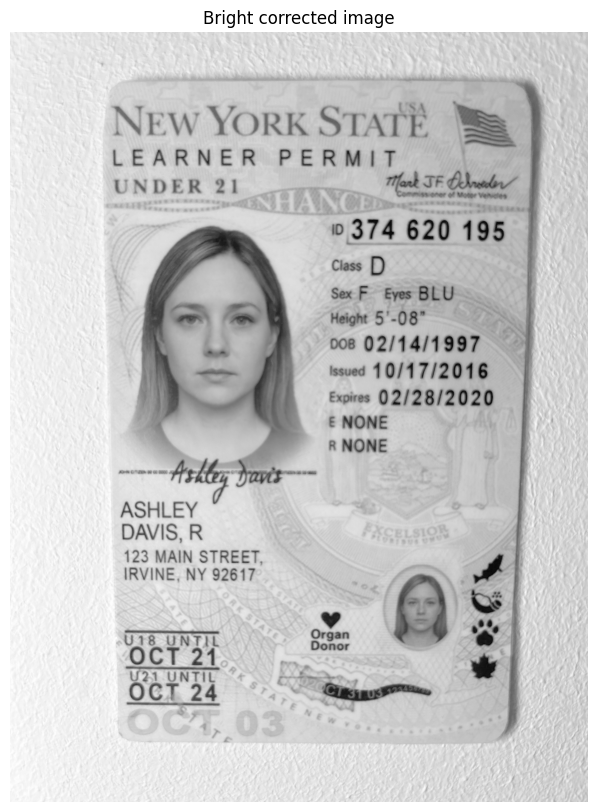

In [144]:
bright_corrected_image = gamma_correction(image, 1.7)
show_image(bright_corrected_image, title="Bright corrected image", cmap="gray")

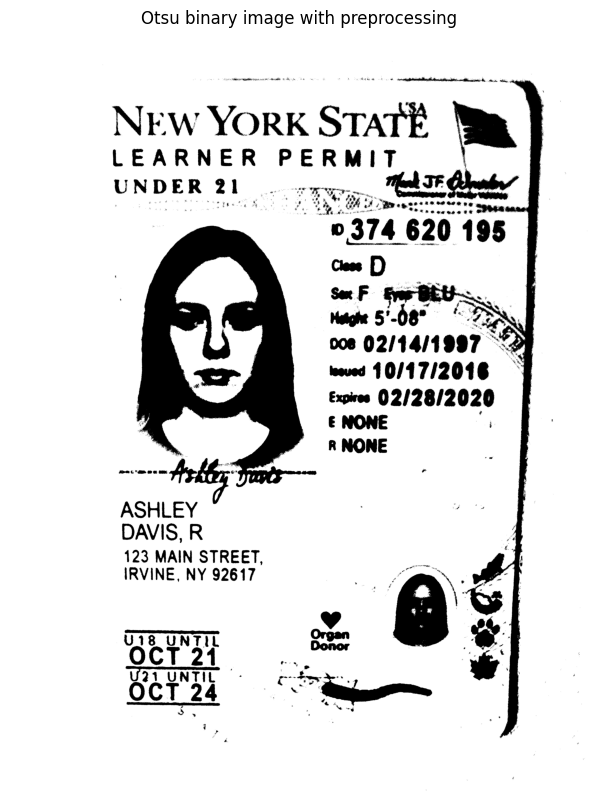

In [145]:
_, binary_image = cv2.threshold(bright_corrected_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_image(binary_image, title="Otsu binary image with preprocessing", cmap="gray")

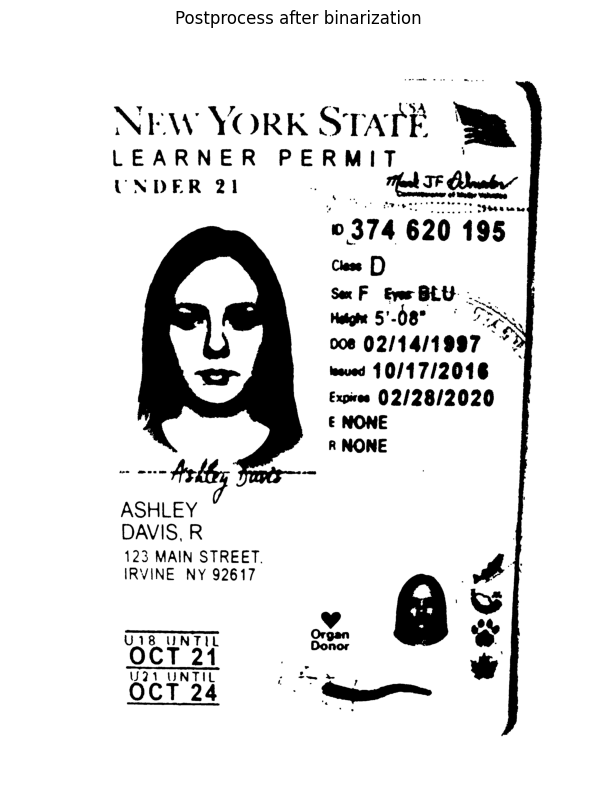

In [155]:
image_to_postprocess = binary_image
image_to_postprocess = cv2.dilate(image_to_postprocess, None, iterations=3)
image_to_postprocess = cv2.erode(image_to_postprocess, None, iterations=2)
show_image(image_to_postprocess, title="Postprocess after binarization", cmap="gray")